In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\maztl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.__version__

'1.26.1'

In [4]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# domain knowledge is a huge part of using unsupervised learning

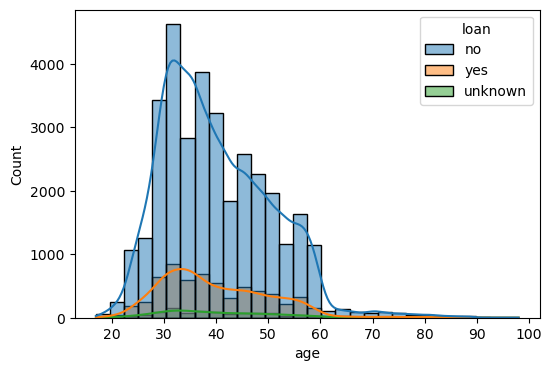

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='age',kde=True,bins=30,hue='loan')
plt.show()

In [19]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

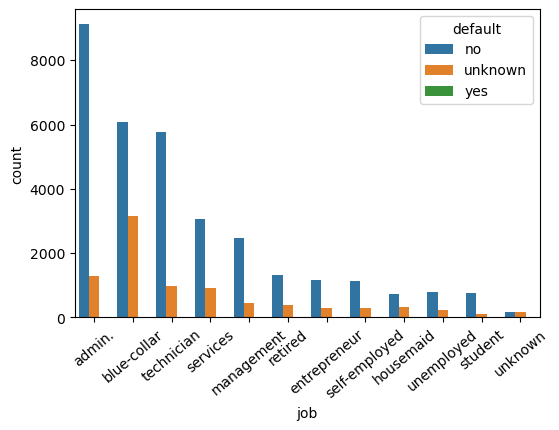

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='job',order=df['job'].value_counts().index,hue='default') # default:拖欠、違約
plt.xticks(rotation=40);
plt.show()

In [23]:
df['default'].value_counts() 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [5]:
x=pd.get_dummies(df)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledx= scaler.fit_transform(x)

In [7]:
from sklearn.cluster import KMeans

In [8]:
model=KMeans(n_clusters=2)

In [9]:
cluster_labels=model.fit_predict(scaledx) # error need to fix the numpy version

In [10]:
x['Cluster']=cluster_labels

In [17]:
x['Cluster'] # 區分成兩個群集

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    1
41185    1
41186    1
41187    1
Name: Cluster, Length: 41188, dtype: int32

In [19]:
type(x['Cluster'])

pandas.core.series.Series

In [11]:
x.corr()['Cluster'] # 像是subscribed_no、 _yes 的值是相反的是正常的

age                    -0.019699
duration                0.039894
campaign               -0.129129
pdays                  -0.267700
previous                0.478467
                          ...   
poutcome_nonexistent   -0.544377
poutcome_success        0.254393
subscribed_no          -0.294610
subscribed_yes          0.294610
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

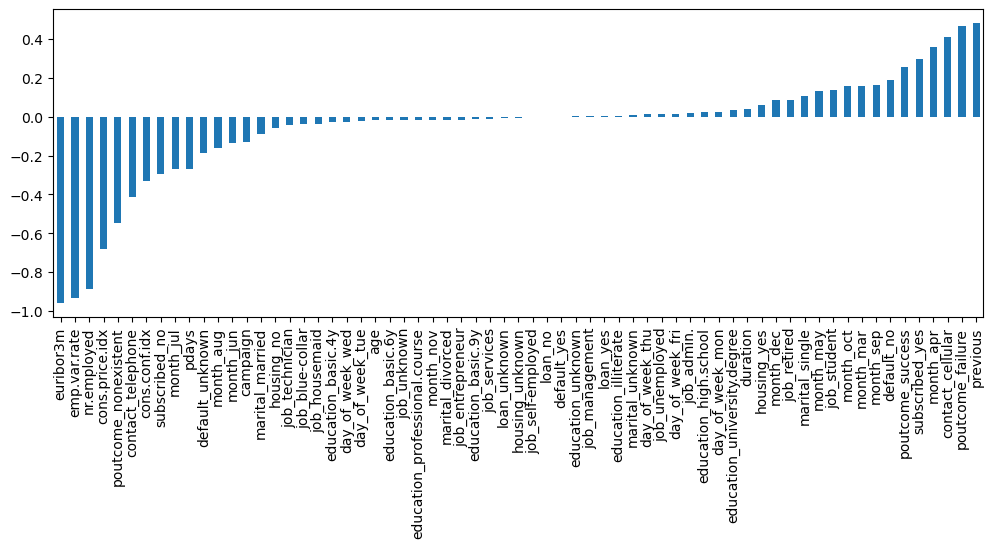

In [20]:
plt.figure(figsize=(12,4))
x.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.show()

In [21]:
# Elbow Method

In [22]:
ssd=[]
for k in range(2,10):
    model=KMeans(n_clusters=k)
    model.fit(scaledx)      # once the model is fitted it retains the ssd on the training data
    ssd.append(model.inertia_)  # ssd point -> cluster center

In [30]:
ssd

[2469792.3616627543,
 2370786.618852339,
 2271502.7521600965,
 2200693.9554628646,
 2167903.377215135,
 2115031.455581166,
 2039948.0382954837,
 2000477.141575574]

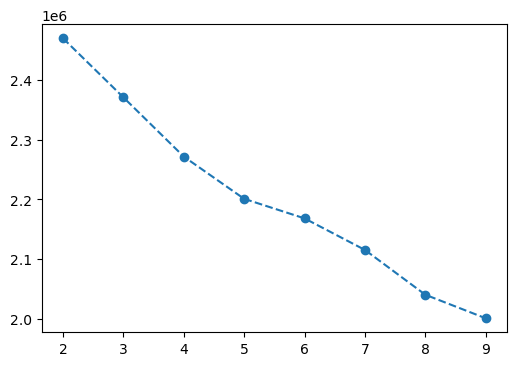

In [29]:
plt.figure(figsize=(6,4))
plt.plot(range(2,10),ssd,'o--')
plt.show()

In [31]:
pd.Series(ssd).diff() #calculater the difference with the previous row

0             NaN
1   -99005.742810
2   -99283.866692
3   -70808.796697
4   -32790.578248
5   -52871.921634
6   -75083.417286
7   -39470.896720
dtype: float64